# Rejection Sampling Methods

In [212]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import rand, random_sample, seed
from scipy.stats import gamma

In [15]:
%config InlineBackend.figure_format = "retina"

## Example:
We want to sample from a $\text{Gamma}(a, b)$ distribution

$$
    \text{Gam}(z|a,b) = \frac{b^a z^{a-1}\exp(-bz)}{\Gamma(a)}
$$

In [382]:
def q(z, c, b):
    x = (z - c) / b
    return 1 / (1 + x ** 2)

In [383]:
a, b = 10, 1
G = gamma(a=a, scale=b)

In [384]:
c = a - 1
b = np.sqrt(2 * a - 1)

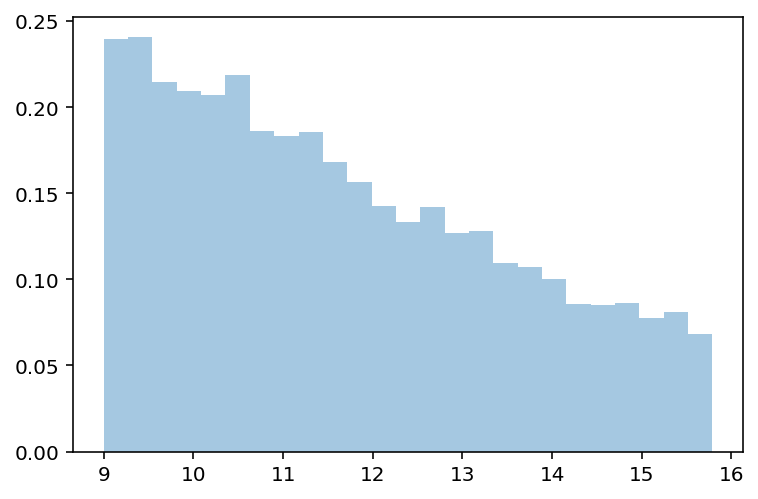

In [416]:
z_rvs = random_sample(10_000)
y_rvs = b * np.tan(z_rvs) + c
sns.distplot(y_rvs, kde=False, norm_hist=True)

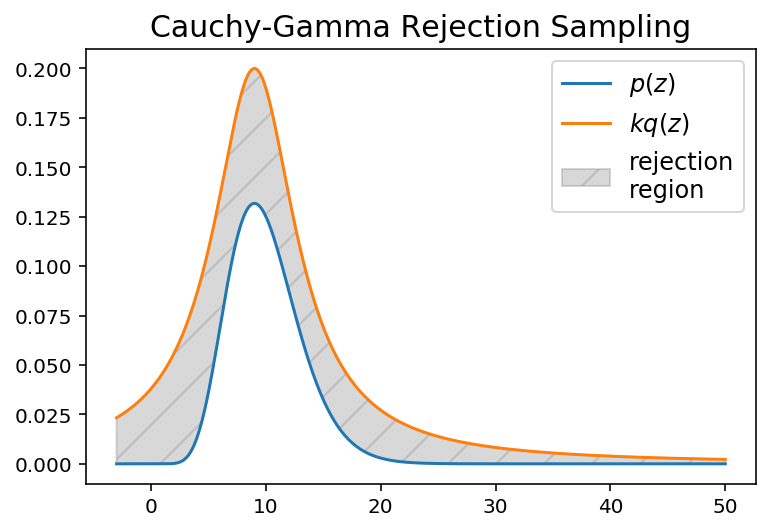

In [405]:
xrange = np.linspace(-3, 50, 500)

k = 0.2
p_density = G.pdf(xrange)
qk_density = k * q(xrange, c, b)

plt.plot(xrange, p_density, label="$p(z)$")
plt.plot(xrange, qk_density, label="$kq(z)$");
plt.fill_between(xrange, p_density, qk_density,
                 color="tab:gray", alpha=0.3, hatch="/",
                 label="rejection\nregion")
plt.legend(fontsize=12)
plt.title("Cauchy-Gamma Rejection Sampling", fontsize=15);